In [2]:
%cd /content/drive/MyDrive/ProductRecomendation


[Errno 2] No such file or directory: '/content/drive/MyDrive/ProductRecomendation'
/content


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [56]:

!git config --global user.email "mirrahatfiverr@gmail.com"
!git config --global user.name "mirrahat"


In [57]:
!git add .
!git commit -m 'Update'

[master (root-commit) 32a61f3] Update
 2 files changed, 18 insertions(+)
 create mode 100644 ProductRecomendation.ipynb
 create mode 100644 README.md


In [63]:
# Reset your commit (go one step back but keep changes)
!git reset HEAD~1

# Remove/replace the token from the notebook (use a text/code editor)
# Look in ProductRecomendation.ipynb, especially near the top (cell 1)

# Re-add and recommit
!git add ProductRecomendation.ipynb
!git commit -m "Removed token from notebook"

# Try pushing again
!git push


fatal: ambiguous argument 'HEAD~1': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
[main c33a33d] Removed token from notebook
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite ProductRecomendation.ipynb (94%)
fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main



In [12]:
import os
os.chdir("/content/drive/MyDrive/ProductRecomendation")

In [13]:
!ls

ProductRecomendation.ipynb  README.md


In [14]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/ratings_Electronics.csv'



# STEP 1: Load CSV without headers
df_raw = pd.read_csv(file_path, header=None)

# STEP 2: Show the first few rows so we can understand the structure
print("First 5 rows of raw data:")
print(df_raw.head())

# STEP 3: Assign proper column names
df_raw.columns = ['user_id', 'product_id', 'rating', 'timestamp']

# STEP 4: Drop timestamp (not needed)
df = df_raw.drop('timestamp', axis=1)

# STEP 5: Verify it's working
print("\nFixed DataFrame:")
print(df.head())

# STEP 6: Basic info check
print("\nShape of dataset:", df.shape)
print("Unique users:", df['user_id'].nunique())
print("Unique products:", df['product_id'].nunique())

df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Optional: Convert scientific notation to string
df['productId'] = df['productId'].astype(str)
df['userId'] = df['userId'].astype(str)


First 5 rows of raw data:
                0           1    2           3
0   AKM1MP6P0OYPR  0132793040  5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200

Fixed DataFrame:
          user_id  product_id  rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0

Shape of dataset: (7824482, 3)
Unique users: 4201696
Unique products: 476002


In [20]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
# Dataset shape
print("Shape of the dataset:", df.shape)

# Unique users and products
print("Unique users:", df['userId'].nunique())
print("Unique products:", df['productId'].nunique())

# Basic statistics
df['rating'].describe()


Shape of the dataset: (7824482, 4)
Unique users: 4201696
Unique products: 476002


,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


Shape of dataset: (7824482, 4)

Unique users: 4201696
Unique products: 476002


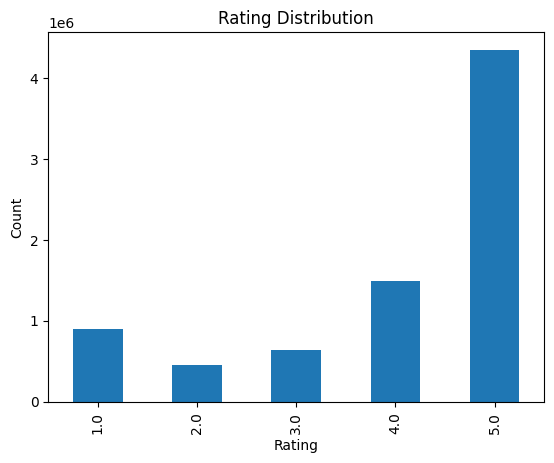

In [32]:
file_path = '/content/drive/MyDrive/dataset/ratings_Electronics.csv'

df = pd.read_csv(file_path, names=['user_id', 'product_id', 'rating', 'timestamp'])


print("Shape of dataset:", df.shape)
print("\nUnique users:", df['user_id'].nunique())
print("Unique products:", df['product_id'].nunique())

# Optional: rating distribution plot
import matplotlib.pyplot as plt
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution', xlabel='Rating', ylabel='Count')
plt.show()
